<h1>Описание исследования</h1>

Мы располагаем данными о клиентах "Метанпромбанка", отделения которого располагаются в городах: Ярославль, Ростов Великий и Рыбинск. Руководство компании интересуется проблемой оттока клиентов и заинтересовано в создании условий для минимизации этого процесса.

<h1>Цель исследования</h1>

Определить портрет клиента "Метанпромбанка", который предрасположен к оттоку - прекращению потребления банковских продуктов и услуг. На основе проведённого анализа дать рекомендацию по удержанию существующих клиентов и по привлечению новых из категории, менее склонных к оттоку.

<h1>Задачи исследования</h1>

1. Подключение библиотек и предварительный обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Сегментирование пользователей на основе данных о количестве потребляемых продуктов и других признаков
5. Формулировка и проверка статистических гипотез
6. Подготовка рекомендаций для зачазчика - менеджера продуктов "Метанпромбанка"

## Подключение библиотек и предварительный обзор данных

**импортируем библиотеки и проводим предварительную оценку исходных данных**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go 
import numpy as np
from scipy import stats as st
!pip install missingno
import missingno as msno


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import requests 
from urllib.parse import urlencode 
 
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/B1J9a5FRYHKBSQ' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 

In [11]:
#выведем 5 случайных строк датафрейма
try:
    df = pd.read_csv(download_url)
except:
    df = pd.read_csv('/datasets/bank_dataset.csv')
finally:
    df = pd.read_csv('https://raw.githubusercontent.com/Cellport/Projects/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D0%B0%20%D0%B1%D0%B0%D0%BD%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D1%85%20%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2/bank_dataset.csv')



df.sample(n=5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
8653,15693190,641,Ярославль,М,57,5,NaN,2,1,1,122449.18,0
1388,15818031,630,Ярославль,Ж,40,0,118633.08,1,0,1,60032.46,1
5639,15844052,523,Ярославль,М,61,8,66250.71,1,1,1,21859.06,0
8975,15806151,567,Ростов Великий,М,41,0,134378.89,1,1,1,105746.94,0
2587,15644628,563,Ярославль,М,33,8,NaN,2,0,1,68815.05,0


In [12]:
#получим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**Получим описательную статистику датасета**

In [13]:
#посмотрим на данные по всем столбцам, а не только числовым
df.describe(include='all')

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.573368e+07,650.528800,NaN,NaN,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,NaN,NaN,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,NaN,NaN,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,NaN,NaN,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,NaN,NaN,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000


Мы видим, что в столбце `estimated_salary` с информацией о зарплатах минимальное значение неправдоподобно низкое, позднее на этапе предобработки вернёмся к этому. Чаще всего из городов в датасете представлен Ярославль, из гендеров - мужчины.

**ВЫВОД ПО РАЗДЕЛУ**

Мы видим, что в датасете всего 10000 строк. Колонки содержат следующие данные:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

Типы данных корректные и не требуют изменения. Пропуски содержатся только в одном столбце `Balance` с информацией о балансе на счёте, их предстоит обработать в дальнейшем. Явных дубликатов в датасете нет. Также на этапе предобработки данных нам нужно будет привести столбцы к нижнему регистру и стилю написания `snake_case`.

Обозначим также какие столбцы датасета содержат количественные и категориальные данные:

<table>
<tr><th>Количественные</th><th>Категориальные</th></tr>
<tr><td>score</td><td>userid</td></tr>
<tr><td>age</td><td>city</td></tr>
<tr><td>objects</td><td>gender</td></tr>
<tr><td>balance</td><td>products</td></tr>
<tr><td>estimated_salary</td><td>creditcard</td></tr>
<tr><td></td><td>loyalty</td></tr>
<tr><td></td><td>churn</td></tr>
</table>

##  Предобработка данных

Для единообразия приведём названия столбцов к нижнему регистру и стилю snake_case

In [14]:
df.columns = df.columns.str.lower()
df.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Как мы выяснили ранее, пропуски содержатся только в столбце `Balance`. Необходимо изучить их, выявить вероятные причины их появления и решить, нужно ли их заполнить или оставить как есть. Дополнительно визуализируем пропуски в датафрейме.

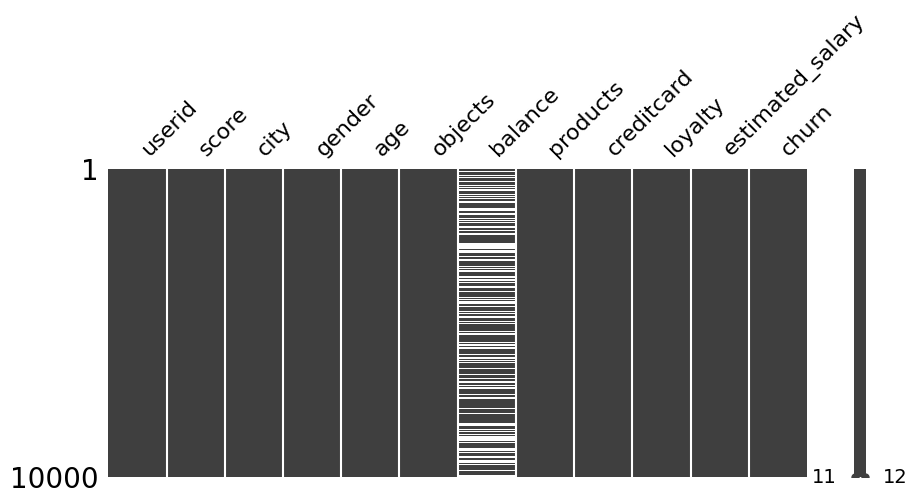

In [15]:
#построим матрицу пропущенных значений
msno.matrix(df, figsize = (10, 4));

Распределение пропусков в столбце на первый взгляд выглядит случайным. Дополнительно проверим наличие пропусков - это систематическая ошибка или случайность. Сгруппируем столбец `Balance` относительно того, есть ли пропуски и заполним столбцы средним значением.

Значение **True** - есть пропуски, **False** - нет пропусков.

In [16]:
df_isnull = df.groupby(df['balance'].isnull()).mean()

#удалим из нового датафрейма нерелевантные столбцы
df_isnull = df_isnull.drop(['userid',	'balance',	'loyalty'], axis=1)
df_isnull

C:\Users\Alim\AppData\Local\Temp\ipykernel_17392\3937345992.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_isnull = df.groupby(df['balance'].isnull()).mean()


,score,age,objects,products,creditcard,estimated_salary,churn
balance,,,,,,,
False,651.138493,39.197713,4.979633,1.386025,0.699201,100717.352956,0.240796
True,649.452861,38.434891,5.071330,1.784628,0.716616,98983.559549,0.138236


In [17]:
#создадим временную таблицу, в которой останутся только строки с пропусками в столбце balance
df_i = df.query('balance.isnull()')
df_i.sample(n=5)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
1531,15757767,600,Ярославль,Ж,28,6,NaN,2,0,1,52193.23,0
5813,15806251,513,Ярославль,М,30,5,NaN,2,1,0,162523.66,0
4454,15684048,615,Ярославль,М,36,6,NaN,1,1,1,27011.80,1
9553,15852321,646,Ярославль,М,38,7,NaN,2,1,0,1528.40,0
185,15697242,514,Ярославль,М,32,8,NaN,2,1,0,95857.18,0


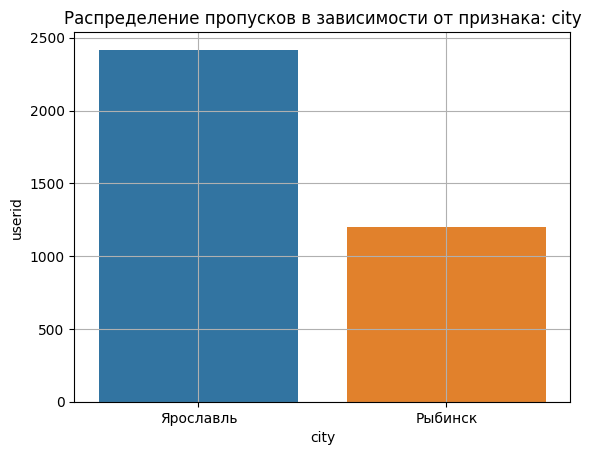

        city  userid
0  Ярославль    2418
1    Рыбинск    1199




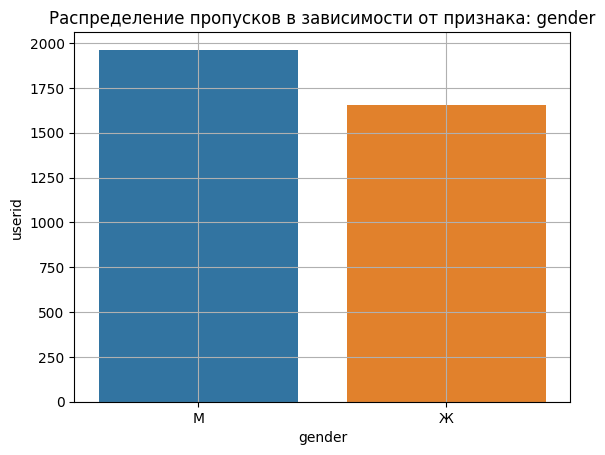

  gender  userid
0      М    1963
1      Ж    1654




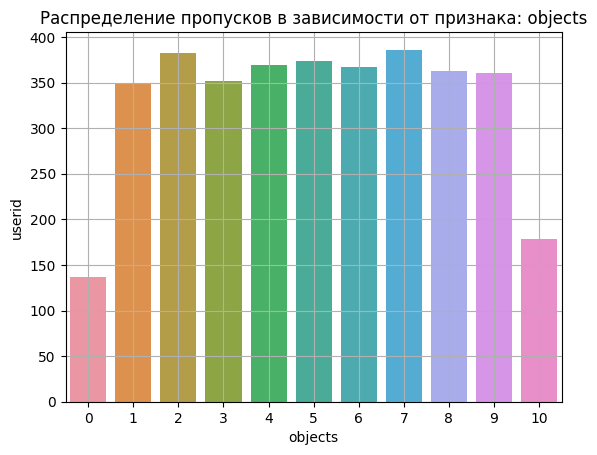

    objects  userid
0         7     386
1         2     382
2         5     374
3         4     369
4         6     367
5         8     363
6         9     360
7         3     352
8         1     349
9        10     178
10        0     137




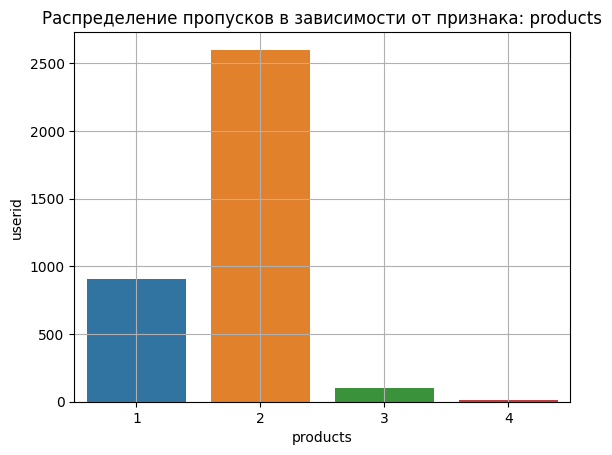

   products  userid
0         2    2600
1         1     905
2         3      98
3         4      14




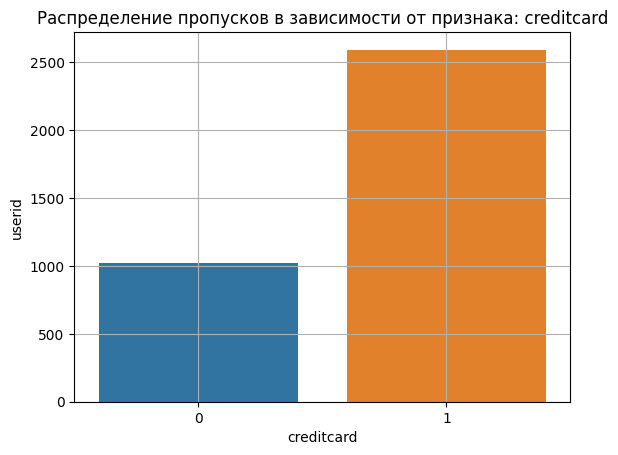

   creditcard  userid
0           1    2592
1           0    1025




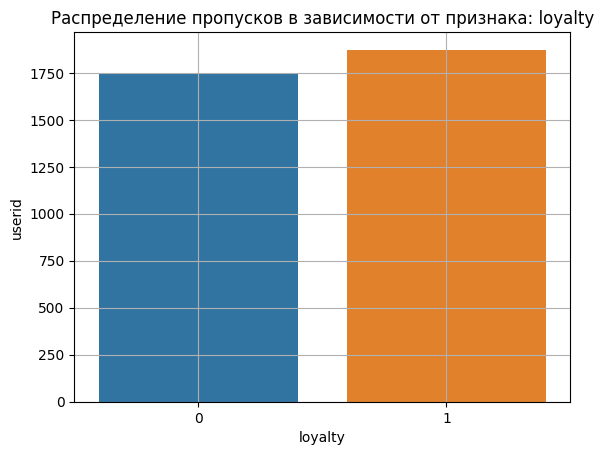

   loyalty  userid
0        1    1873
1        0    1744




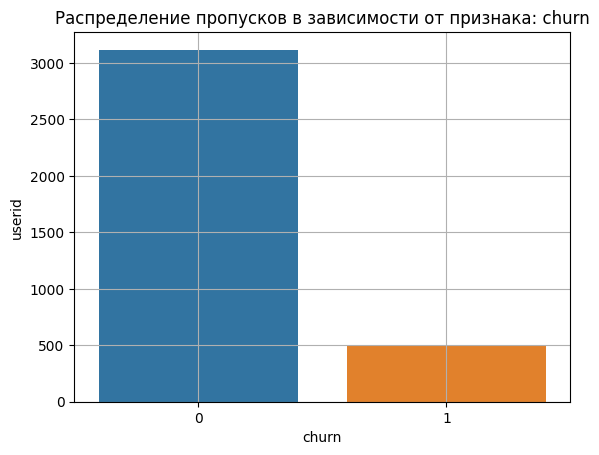

   churn  userid
0      0    3117
1      1     500




In [18]:
list2 = ['city', 'gender', 'objects', 'products',	'creditcard', 'loyalty', 'churn']
for i in list2:
    grouped = df_i.groupby(i)['userid'].count().sort_values(ascending=False).reset_index()
    sns.barplot(data=grouped, x=i, y='userid')
    plt.title(f'Распределение пропусков в зависимости от признака: {i}')
    plt.grid(True)
    
    plt.show();
    print(grouped, end='\n\n\n')

Сгруппированный датафрейм  показывает нам, что в пропусках нет определенной закономерности и они, случайны. Для того, чтобы заполнить пропуски каким-то универсальным значением, нет определённого критерия. Баланс - достаточно индивидуальная характеристика. Пропуски оставляем незаполненными.

**Исследование пропусков в различных разрезах данных показывает, что:**
- пропущенных значений больше в ярославском филиале - возможно сотрудники здесь менее внимательны к заполнению этих данных, примечательно, что в отделении банка в Ростове Великом пропуски отсутствуют совсем
- распределение пропусков между мужчинами и женщинами и лояльными/нелояльными практически равнозначно
- пропуски в зависимости от количества объектов в собственности распределены нормально, нет какой-либо заметной тенденции
- среди пользователей двух продуктов банка пропусков также больше 
- больше пропусков также среди обладателей кредитных карт, возможно процедура при заполнении соответствующих документов менее требовательная к такого рода данным.
- в данных о клиентах, которые продолжают пользоваться услугами банка также больше пропусков, не исключено, что для привлечения клиентов допускается проускать данные о балансе при заполнении документов.

**ПОИСК ДУБЛИКАТОВ**

Проверим датасет на явные дубликаты.

In [19]:
#проверим датафрейм на наличие дубликатов
df.duplicated().sum()

0

Мы выяснили, что явные дубликаты отсутствуют. Уникальная характеристика, которая укажет на возможность неявных дубликатов - это `id` пользователя. Прежде всего проверим есть ли повторы в столбце `userid`. Также проверим нет ли различных вариантов написания в столбцах  `city` и `gender`.

In [20]:
list = ['userid', 'city', 'gender']

for column in list:
  print(df[column].value_counts().to_frame().reset_index().rename(columns={'index': column, column: 'count'}), end='\n\n')

        userid  count
0     15677338      1
1     15710668      1
2     15808921      1
3     15710368      1
4     15641760      1
...        ...    ...
9995  15641814      1
9996  15745036      1
9997  15703471      1
9998  15714126      1
9999  15671055      1

[10000 rows x 2 columns]

             city  count
0       Ярославль   5014
1  Ростов Великий   2509
2         Рыбинск   2477

  gender  count
0      М   5457
1      Ж   4543



Повторяющихся `id` пользователей нет, альтернативных написаний городов и пола тоже нет. Делаем вывод, что неявные дубликаты тоже отсутствуют.

**ВЫВОД ПО РАЗДЕЛУ**

Основным вопросом на этапе предобработки данных было понимание того, что делать с пропущенными значениями в столбце `Balance`. Взаимосвязей пропусков с какими-то другими характеристиками клиентов не обнаружено, пропущенные значения в столбце было решено не заполнять, т.к. количество средств на балансе - характеристика индивидуальная. В датафрейме изначально были корректные типы данных и отсутствовали дубликаты.

## Исследовательский анализ данных

1. исследование выбросов в данных
3. изучение взаимосвязей данных и построение визуализаций

Прежде всего обозначим какие столбцы в датафрейме содержат категориальные и количественные данные:
<table width='600'>
  <tr>
  <th>Категориальные</th><th>Количественные</th>
  </tr>
  <tr>
  <td>userid</td><td>score</td>
  </tr>
  <tr>
  <td>city</td><td>age</td>
  </tr>
  <tr>
  <td>gender</td><td>objects</td>
  </tr>
  <tr>
  <td>creditcard</td><td>balance</td>
  </tr><tr>
  <td>loyalty</td><td>estimated_salary</td>
  </tr>
  <tr>
  <td>churn</td><td>products</td>
  </tr>
  <tr>
  <td></td><td></td>
  </tr>
</table>

1. исследование выбросов в данных


list_of_col = ['score', 'age', 'objects', 'balance', 'estimated_salary', 'products']

for j in list_of_col:
   plt.hist(x=j, bins=20, figsize=(10, 4))
    plt.title(f'Распределение данных: {j}')
    plt.show;Построим графики распределения для столбцов таблицы с количественными данными.

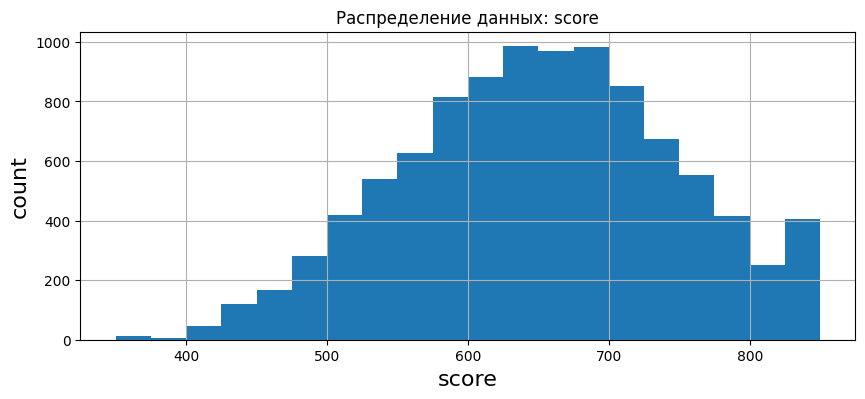

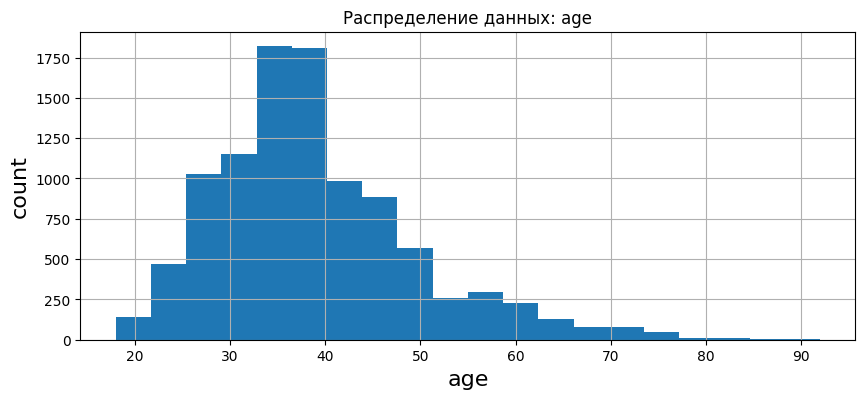

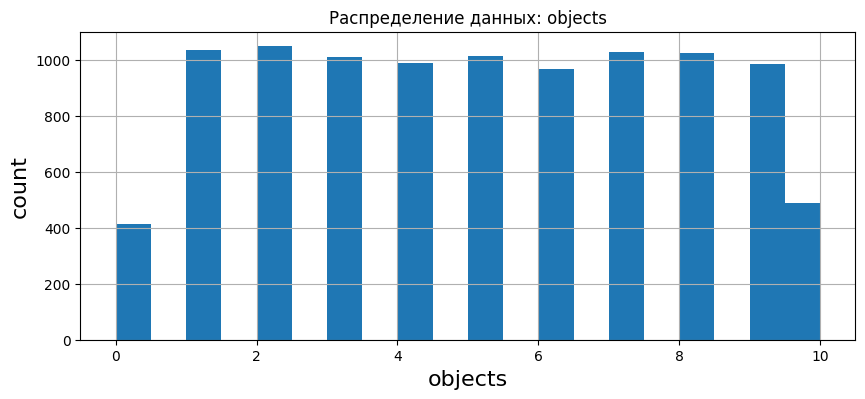

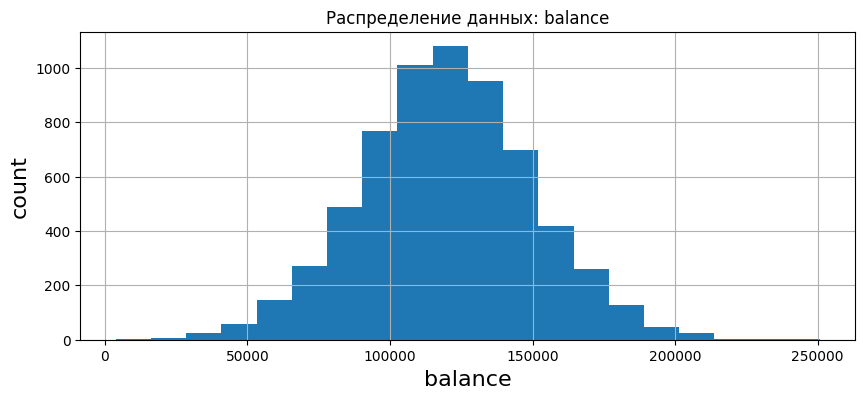

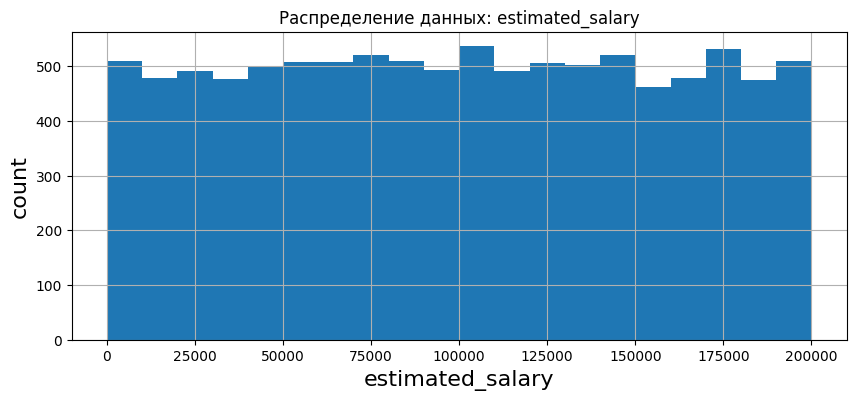

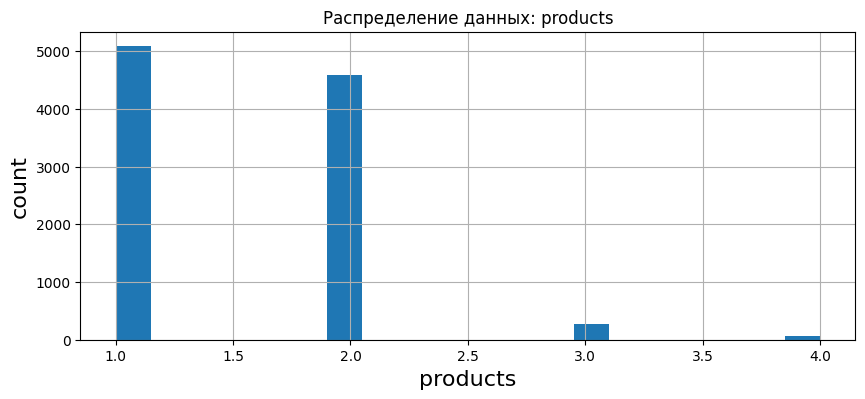

In [21]:
list_of_col = ['score', 'age', 'objects', 'balance', 'estimated_salary', 'products']

for j in list_of_col:
    df.hist(j, bins=20, figsize=(10, 4))
    plt.title(f'Распределение данных: {j}')
    plt.xlabel(j, fontsize=16)
    plt.ylabel('count', fontsize=16)
    plt.show;

По графикам мы видим, что столбцы с баллами кредитного скоринга (`score`), количеством объектов в собственности (`objects`) и балансом (`balance`) имеют нормальное распределение. У столбца с возрастом (`age`) наблюдается скошенность вправо. У колонки с количеством используемых продуктов (`products`) график похож на распределение Пуассона. Данные о зарплате клиента (`estimated_salary`) похожи на однородное распределение.

Для поиска аномальных выбивающихся значений ещё раз посмотрим распределение и построим диаграммы размаха для столбцов с количественными значениями.

In [22]:
df.describe().round(2)

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15733676.57,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.4
min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.0
25%,15671264.25,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.0
50%,15733474.00,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.92,0.0
75%,15795969.75,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.0
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


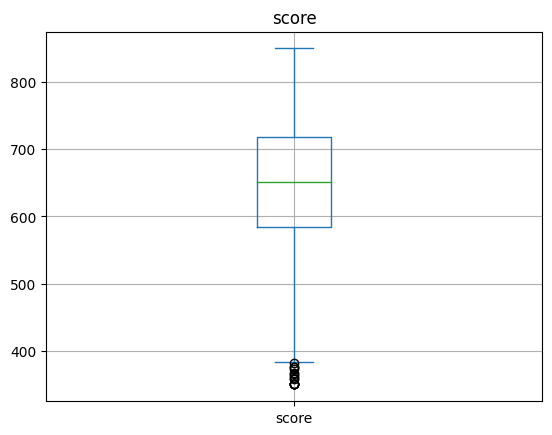

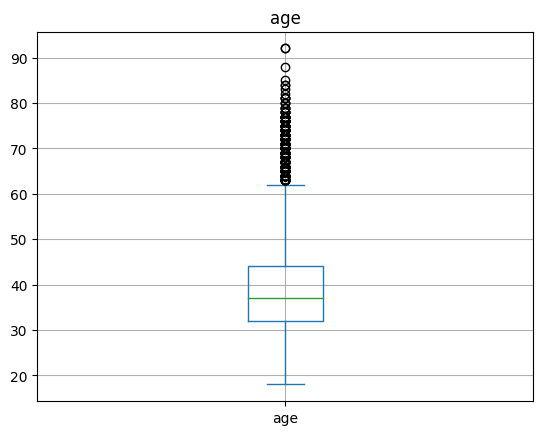

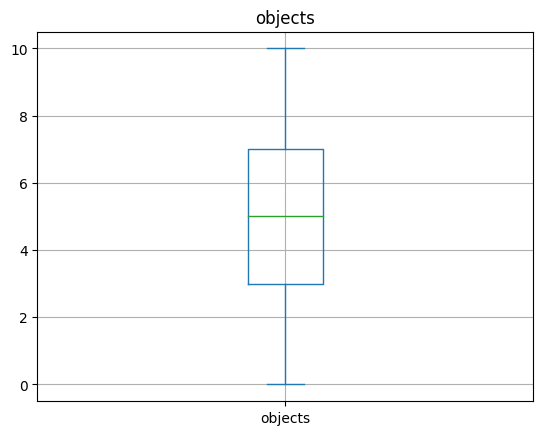

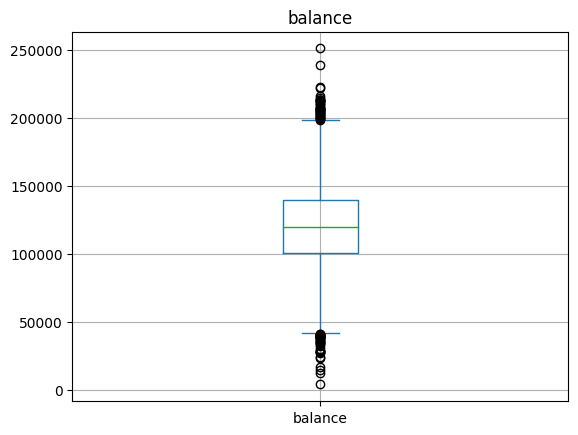

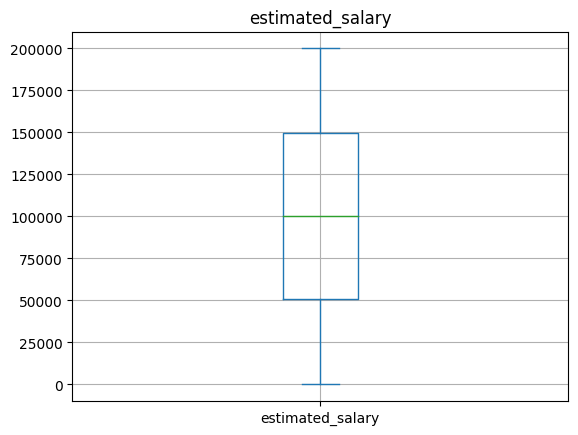

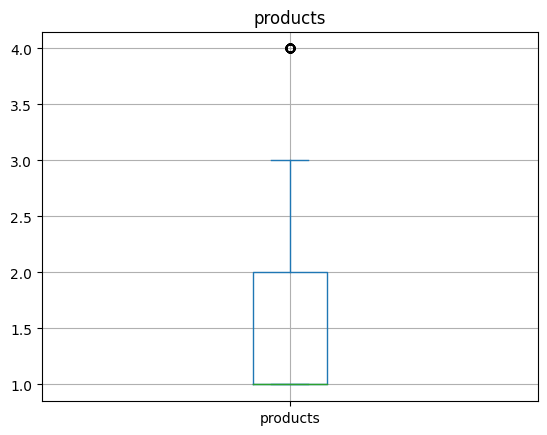

In [23]:
#построим диаграмы размаха по каждому столбцу с количественными данными для выявления выбросов
columns = ['score', 'age', 'objects', 'balance', 'estimated_salary', 'products']

for column in columns:
  plt.figure()
  df[column].plot(kind='box')
  plt.grid(True)
  plt.title(column)
  plt.show()
  


По графикам мы видим, что выбросы за пределы размаха существуют в столбцах с баллами кредитного рейтинга `score`, показателем возраста`age`, балансом `balance` и количеством используемых продуктов `products`. Клиентов с совсем низким кредитным рейтингом не стоит удалять из исследования, т.к. именно эта категория может быть с потенциалом к оттоку что нужно изучить, в колонке с возрастом за пределами верхней границы размаха - люди пенсионного и околопенсионного возраста, предположительно это достаточно стабильная категория клиентов, "хвосты" по верхней и нижней границе размаха в столбце `balance` не будем отбрасывать, т.к. ранее уже было сказано - сумма на счёте индивидуальный показатель и однозначно отсекать данные здесь не стоит, выбросы в столбце `products` не трогаем тоже. 

2. Изучение взаимосвязей данных и построение визуализаций

Мы предполагаем, что показатель оттока зависит от количества продуктов, которые клиент использует. Следующим шагом в очищенном датафрейме создадим столбец с названием категорий для разного количества используемых продуктов.

In [24]:
def products_group(row):
    products = row['products']
    if products == 1:
        return 'один продукт'
    elif products >= 2:
        return 'два и более продуктов'
    
df['product_type'] = df.apply(products_group, axis = 1)

In [25]:
#создадим категории также для показателей кредитного рейтинга, за границы категорий возьмем квартили

def score_group(row):
    score = row['score']
    if score < 584:
        return 'низкий рейтинг'
    elif 584 <= score < 652:
        return 'средний рейтинг'
    elif score >=718:
        return 'высокий рейтинг'
    
df['score_type'] = df.apply(score_group, axis = 1)

#возраста
def age_group(row):
    score = row['age']
    if score < 35:
        return 'молодёжь'
    elif 35 <= score < 60:
        return 'средний возраст'
    elif score >=60:
        return 'пенсионный возраст'
    
df['age_type'] = df.apply(age_group, axis = 1)


#баланса
def balance_group(row):
    balance = row['balance']
    if balance < 100359:
        return 'низкий баланс'
    elif 100359 <= balance < 119984:
        return 'средний баланс'
    elif balance >=119984:
        return 'высокий баланс'
    
df['balance_type'] = df.apply(balance_group, axis = 1)

#и зарплаты
def salary_group(row):
    salary = row['estimated_salary']
    if salary < 60989:
        return 'небольшая зарплата'
    elif 60989 <= salary < 106367:
        return 'средняя зарплата'
    elif salary >=106367:
        return 'высокая зарплата'
    
df['salary_type'] = df.apply(salary_group, axis = 1)
df.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,product_type,score_type,age_type,balance_type,salary_type
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,один продукт,средний рейтинг,средний возраст,None,средняя зарплата
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,один продукт,средний рейтинг,средний возраст,низкий баланс,высокая зарплата
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,два и более продуктов,низкий рейтинг,средний возраст,высокий баланс,высокая зарплата
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,два и более продуктов,None,средний возраст,None,средняя зарплата
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,один продукт,высокий рейтинг,средний возраст,высокий баланс,средняя зарплата


Изучим распределение данных по различным категориям:

- кредитному скорингу
- городу
- полу
- возрасту
- балансу
- количеству используемых продуктов
- уровню зарплаты

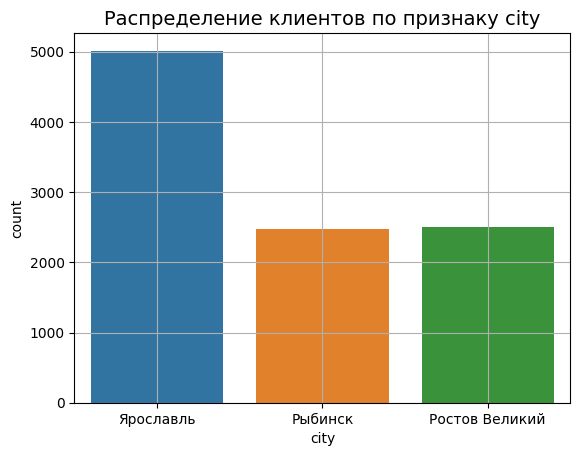

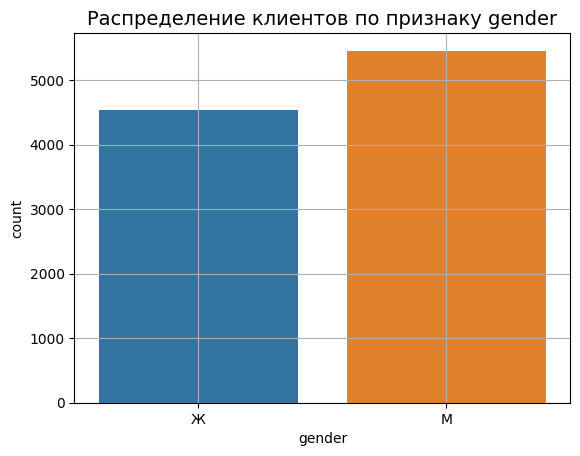

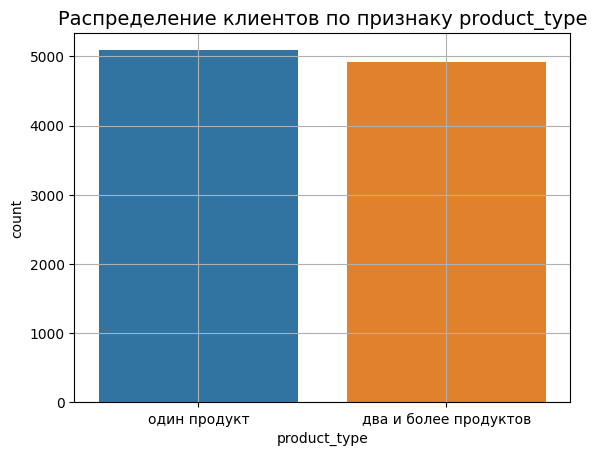

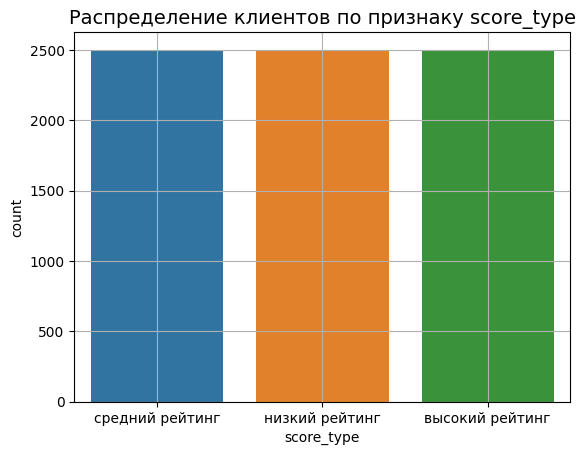

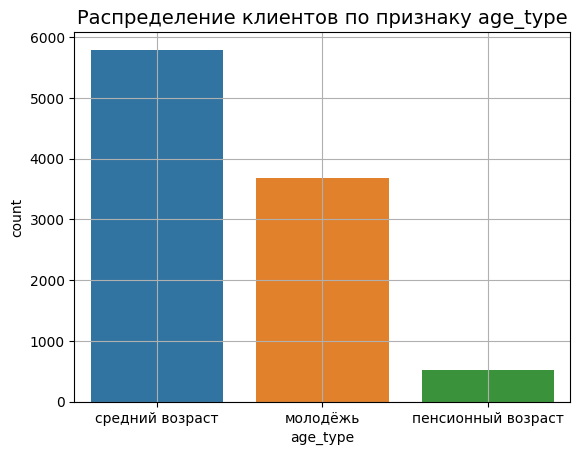

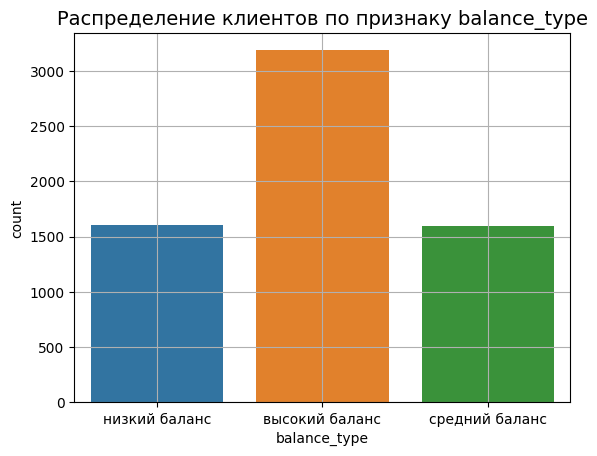

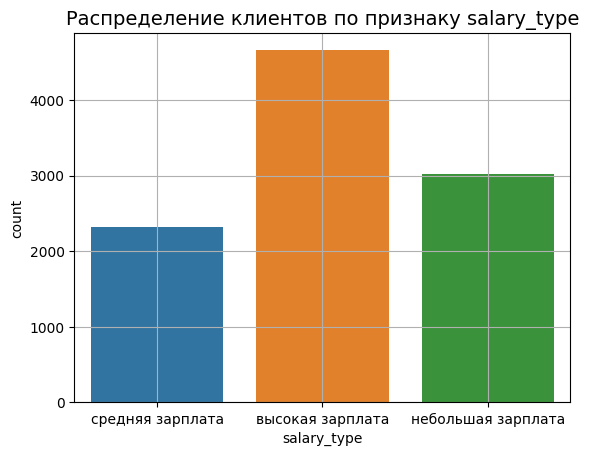

In [26]:
for column in ['city','gender', 'product_type',	'score_type',	'age_type',	'balance_type',	'salary_type']:
        ax = sns.countplot(data=df, x=column);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 14)
        plt.grid(True)
        plt.show()


Полученные графики показывают нам:
- что самый крупный филиал находится в Ярославле
- мужчин среди клиентов немного больше, чем женщин
- большая часть пользователей используют один продукт банка
- в категориях по уровню кредитного рейтинга распределение примерно равное
- наибольшее количество клиентов банка возрастом от 35 до 60 лет, наименьшее - люди пенсионного возраста.

**Распределение оттока пользователей на основе данных о количестве потребляемых продуктов и по другим признакам**

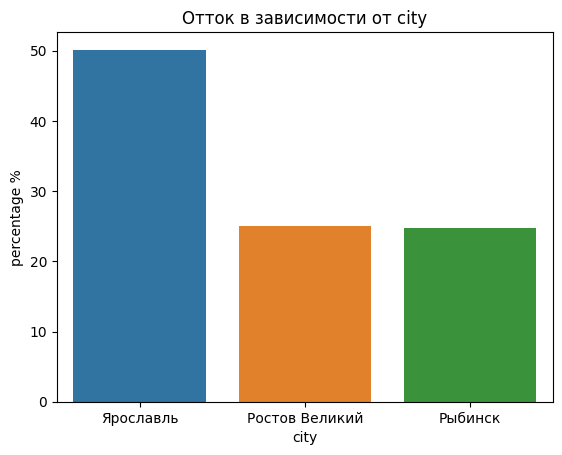

             city  churn  percentage %
0       Ярославль   5014         50.14
1  Ростов Великий   2509         25.09
2         Рыбинск   2477         24.77





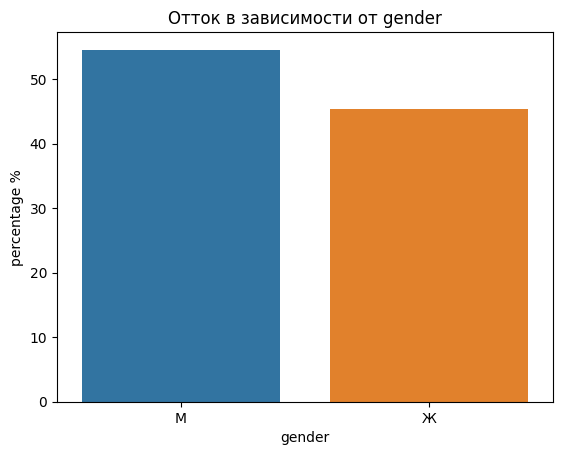

  gender  churn  percentage %
0      М   5457         54.57
1      Ж   4543         45.43





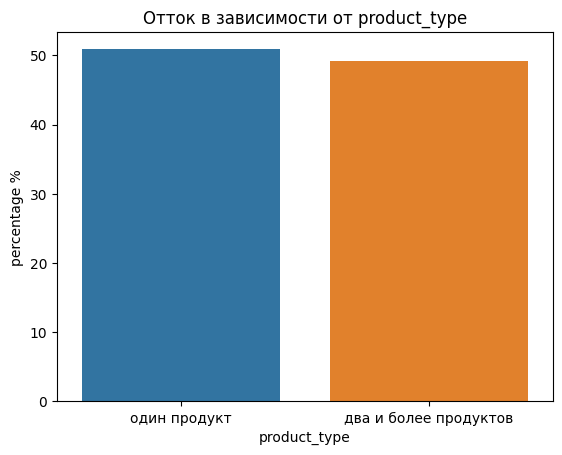

            product_type  churn  percentage %
0           один продукт   5084         50.84
1  два и более продуктов   4916         49.16





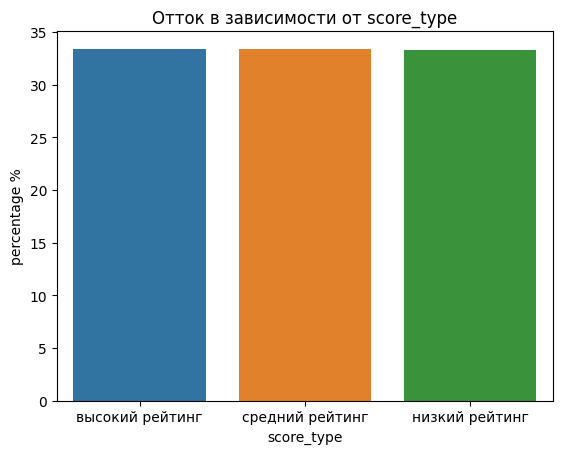

        score_type  churn  percentage %
0  высокий рейтинг   2501         33.40
1  средний рейтинг   2496         33.33
2   низкий рейтинг   2491         33.27





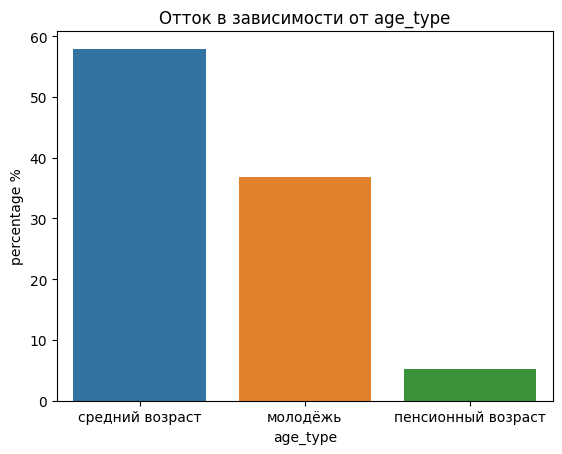

             age_type  churn  percentage %
0     средний возраст   5795         57.95
1            молодёжь   3679         36.79
2  пенсионный возраст    526          5.26





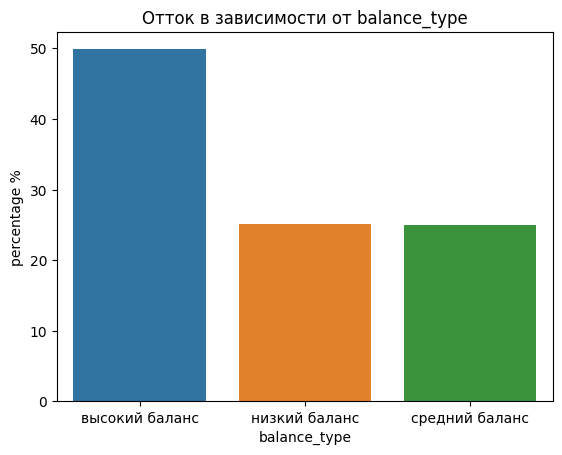

     balance_type  churn  percentage %
0  высокий баланс   3182         49.85
1   низкий баланс   1608         25.19
2  средний баланс   1593         24.96





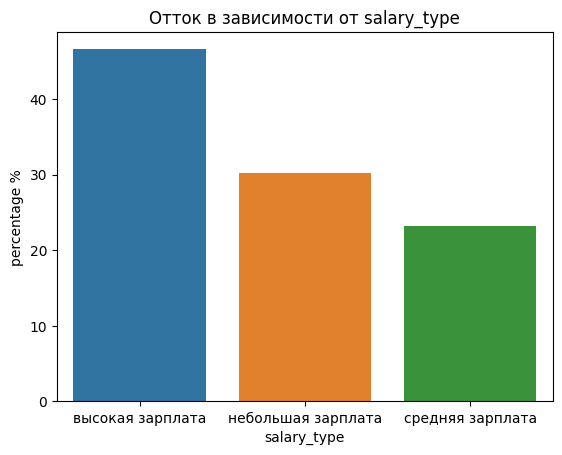

          salary_type  churn  percentage %
0    высокая зарплата   4653         46.53
1  небольшая зарплата   3021         30.21
2    средняя зарплата   2326         23.26





In [27]:
for col in ['city', 'gender', 'product_type', 'score_type', 'age_type', 'balance_type', 'salary_type']:
        var = col+"_text"
        
        var = df.groupby(col)['churn'].count().sort_values(ascending=False)
        var = var.to_frame().reset_index()

        var['percentage %'] = round(100 * var['churn'] / var['churn'].sum(), 2)
        
        sns.barplot(data=var, x=col, y='percentage %')
        plt.title(f'Отток в зависимости от {col}')
        plt.show();
        print(var, end='\n\n\n\n')

Полученные датафреймы и графики показывают:

- наибольший отток клиентов происходит в ярославском филиале "Метанпромбанка
- наибольший процент оттока клиентов среди клиентов, использующих один продукт банка, но отток у клиентов, использующих два продукта ненамного меньше.
- отток среди клиентов из групп с разным кредитным скорингом примерно равнозначен
- наибольший процент оттока среди возрастных групп среди людей среднего возраста
- в группе людей с большой суммой на счёте больше других так же как и среди людей с наибольшей зарплатой



**ИССЛЕДОВАНИЕ КОРРЕЛЯЦИЙ**

Изучим как различные признаки коррелируют между собой. Для этого закодируем некоторые категориальные данные и создадим новые столбцы.

In [28]:
#закодируем столбцы с городами, и полом
def onehot_yar(row):
    city = row['city']
    if city == 'Ярославль':
        return 1
    elif city != 'Ярославль':
        return 0
    
def onehot_ryb(row):
    city = row['city']
    if city == 'Рыбинск':
        return 1
    elif city != 'Рыбинск':
        return 0

def onehot_rost(row):
    city = row['city']
    if city == 'Ростов Великий':
        return 1
    elif city != 'Ростов Великий':
        return 0

def onehot_gender(row):
    city = row['gender']
    if city == 'М':
        return 1
    elif city != 'Ж	':
        return 0    

df['yaroslavl'] = df.apply(onehot_yar, axis = 1)
df['rybinsk'] = df.apply(onehot_ryb, axis = 1)
df['rostov_vel'] = df.apply(onehot_rost, axis = 1)

df['gender_code'] = df.apply(onehot_gender, axis = 1)
df.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,...,churn,product_type,score_type,age_type,balance_type,salary_type,yaroslavl,rybinsk,rostov_vel,gender_code
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,...,1,один продукт,средний рейтинг,средний возраст,None,средняя зарплата,1,0,0,0
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,...,0,один продукт,средний рейтинг,средний возраст,низкий баланс,высокая зарплата,0,1,0,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,...,1,два и более продуктов,низкий рейтинг,средний возраст,высокий баланс,высокая зарплата,1,0,0,0
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,...,0,два и более продуктов,None,средний возраст,None,средняя зарплата,1,0,0,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,...,0,один продукт,высокий рейтинг,средний возраст,высокий баланс,средняя зарплата,0,1,0,0


In [29]:
#создадим дубликат таблицы для построения матрицы корреляции и упростим её, удалив категориальные столбцы
df_corr = df

df_corr = df_corr.drop(columns=['product_type', 'score_type', 'age_type', 'balance_type', 'salary_type', 'city', 'gender'])
df_corr.sample(n=5)

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,yaroslavl,rybinsk,rostov_vel,gender_code
415,15852352,626,26,8,NaN,2,0,0,191420.71,0,0,1,0,1
6123,15757229,465,33,6,NaN,2,1,1,95500.98,0,0,1,0,0
4211,15657943,792,47,0,NaN,1,1,1,5557.88,1,0,1,0,1
4438,15626586,672,68,0,126061.51,2,1,1,184936.77,0,0,0,1,1
6333,15666480,634,34,8,105302.66,1,1,1,123164.97,0,1,0,0,1


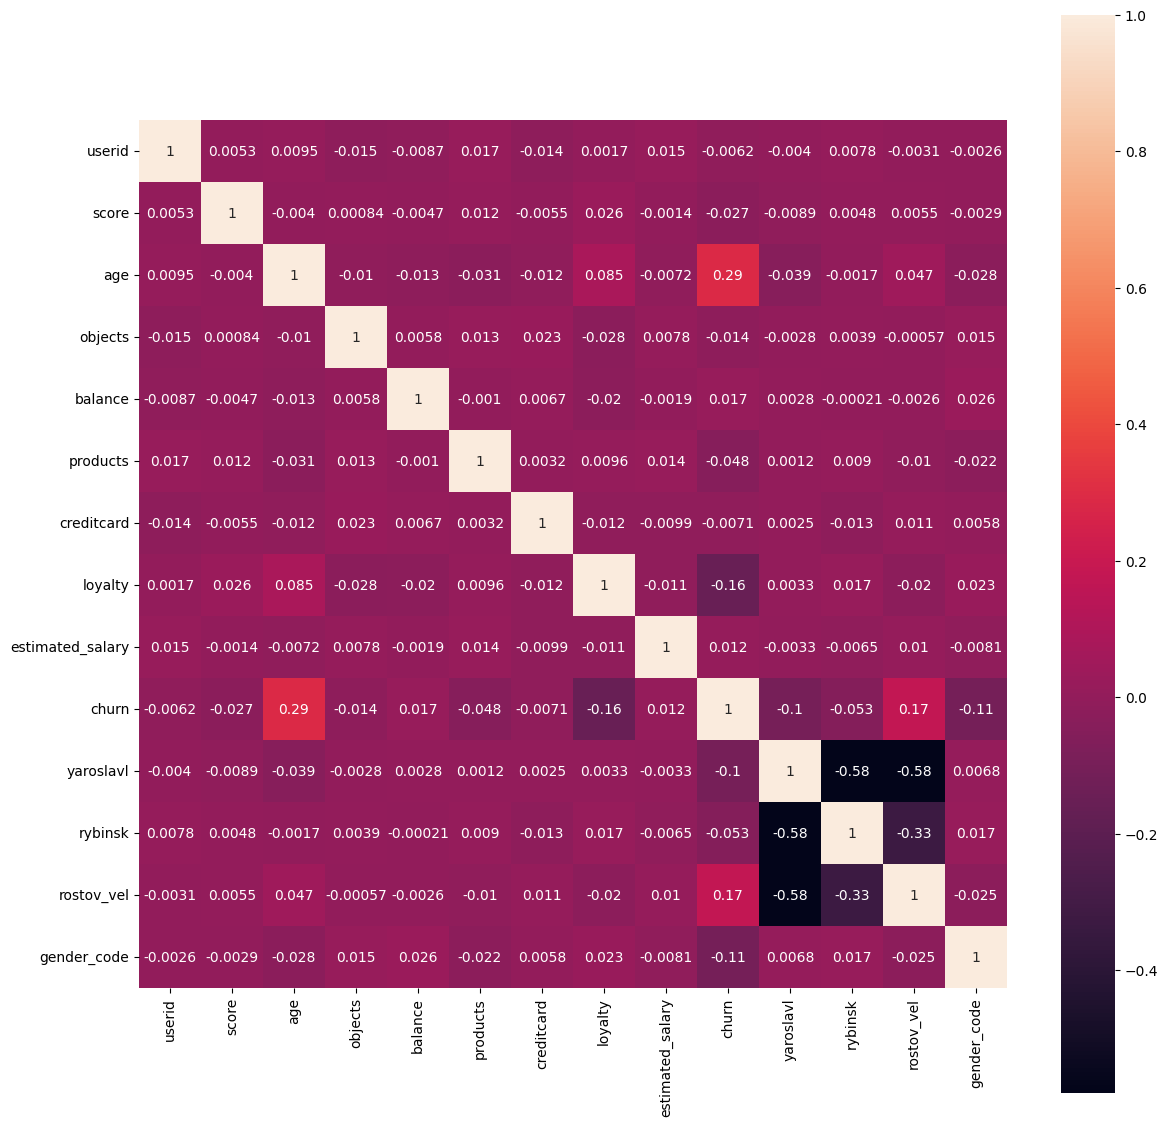

In [30]:
#построим матрицу корреляций
matrix = df_corr.corr()
plt.figure(figsize=(14,14))

#построим тепловую карту
sns.heatmap(matrix, annot=True, square=True)

plt.show()

Максимальная корреляция `(0.29)` отмечается между оттоком и возрастом. Однако здесь нельзя говорить о сильной корреляции, в целом можно сделать вывод, что признаки практически не коррелируют между собой.

**ВЫВОД ПО РАЗДЕЛУ**


На этапе исследовательского анализа данных мы определили количественные и категориальные типы данных. Выяснили какие данные имеют нормальное и другие типы распределений. Выбросы данных, обнаруженные в некоторых столбцах удалять не стали намеренно.

Также мы произвели категоризацию числовых данных, расчитали распределение данных по различным признакам и выяснили, что самый крупный филиал находится в Ярославле, среди клиентов по количеству преобладают мужчины и люди среднего возраста, а также большая часть пользователей используют один продукт банка.

Мы провели анализ по оттоку клиентов в разрезе этих же групп и определили что различия оттока в группах клиентов, использующих один продукт банка и от двух и больше есть, но незначительны, отток в группе клиентов с большим числом продуктов гораздо ниже. Отток в группах с разным кредитным рейтингом практически не отличается, соответственно не зависит от него. Люди среднего возраста наиболее склонны к отказу от услуг "Метанпромбанка", пенсионеры в этом смысле более консервативны. Что интересно, клиенты с высоким уровнем дохода и балансом на счёте.

На основе вышеописанных данных можно составить **примерный портрет пользователя, склонного к оттоку**:
"*Это мужчина из Ярославля, среднего возраста, с высоким уровнем дохода и заработной платой, использующий один продукт "Метанпромбанка*"

## Сегментирование пользователей на основе данных о количестве потребляемых продуктов и других признаков

Основываясь на предществующем исследовании распределения оттока в зависимости от различных категорий, создадим несколько сегментов и проверим отток в них. Мы выделим следующие сегменты клиентов:

- средний возраст с высокой зарплатой
- средний возраст с большим счётом
- использует один продукт и имеет высокий доход
- использует один продукт и обладает большим счётом
- женщина с высоким доходом
- мужчина с высоким доходом

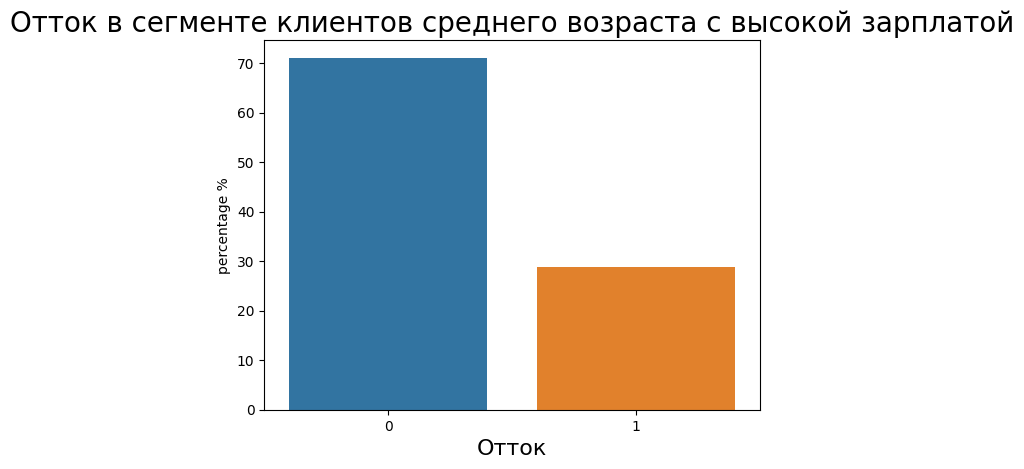

,churn,userid,percentage %
0,0,1892,71.1
1,1,769,28.9


In [31]:
#средний возраст с высокой зарплатой
midage_highsal = df.query('age_type == "средний возраст" & salary_type == "высокая зарплата"')

#подсчитаем отток в сегменте
midage_highsal_churn = midage_highsal.groupby('churn')['userid'].count().sort_values(ascending=False).reset_index()

#создадим столбец с процентом оттока
midage_highsal_churn['percentage %'] = round(100 * midage_highsal_churn['userid'] / midage_highsal_churn['userid'].sum(), 2)

#построим график оттока в сегменте
sns.barplot(data=midage_highsal_churn, x='churn', y='percentage %')
plt.title('Отток в сегменте клиентов среднего возраста с высокой зарплатой', fontsize=20)
plt.xlabel('Отток', fontsize=16)

plt.show();
display(midage_highsal_churn)

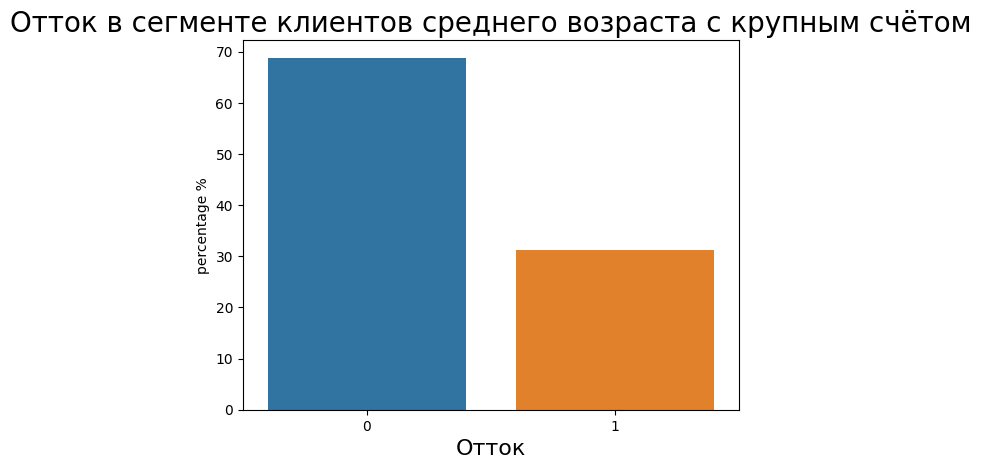

,churn,userid,percentage %
0,0,1294,68.83
1,1,586,31.17


In [32]:
#средний возраст с крупным счётом
midage_highbal = df.query('age_type == "средний возраст" & balance_type == "высокий баланс"')


#подсчитаем отток в сегменте
midage_highbal_churn = midage_highbal.groupby('churn')['userid'].count().sort_values(ascending=False).reset_index()

#создадим столбец с процентом оттока
midage_highbal_churn['percentage %'] = round(100 * midage_highbal_churn['userid'] / midage_highbal_churn['userid'].sum(), 2)

#построим график оттока в сегменте
sns.barplot(data=midage_highbal_churn, x='churn', y='percentage %')
plt.title('Отток в сегменте клиентов среднего возраста с крупным счётом', fontsize=20)
plt.xlabel('Отток', fontsize=16)

plt.show();
display(midage_highbal_churn)

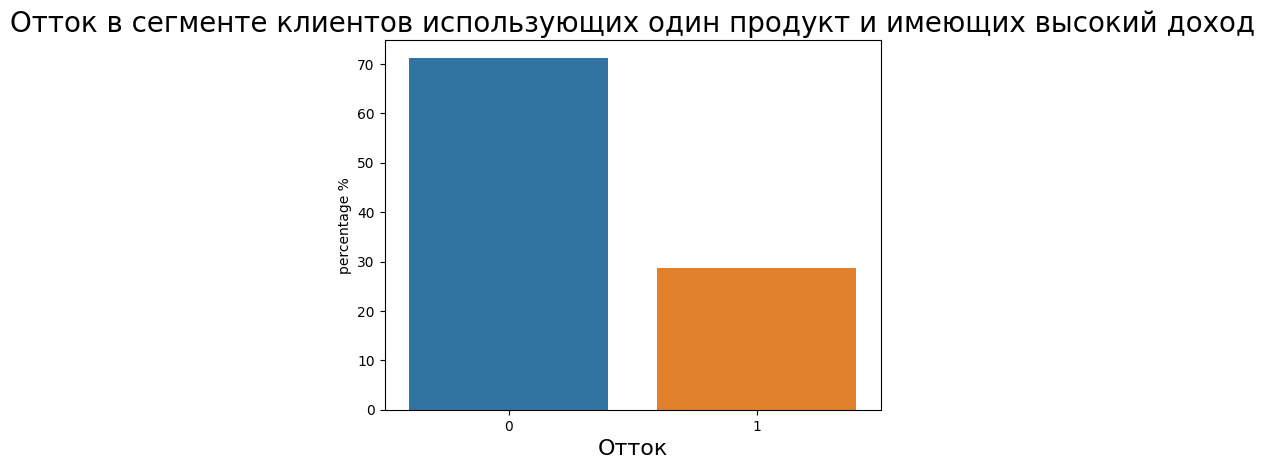

,churn,userid,percentage %
0,0,1680,71.25
1,1,678,28.75


In [33]:
#используют один продукт и имеют высокую зп
oneprod_highsal = df.query('product_type == "один продукт" & salary_type == "высокая зарплата"')



#подсчитаем отток в сегменте
oneprod_highsal_churn = oneprod_highsal.groupby('churn')['userid'].count().sort_values(ascending=False).reset_index()

#создадим столбец с процентом оттока
oneprod_highsal_churn['percentage %'] = round(100 * oneprod_highsal_churn['userid'] / oneprod_highsal_churn['userid'].sum(), 2)

#построим график оттока в сегменте
sns.barplot(data=oneprod_highsal_churn, x='churn', y='percentage %')
plt.title('Отток в сегменте клиентов использующих один продукт и имеющих высокий доход', fontsize=20)
plt.xlabel('Отток', fontsize=16)

plt.show();
display(oneprod_highsal_churn)

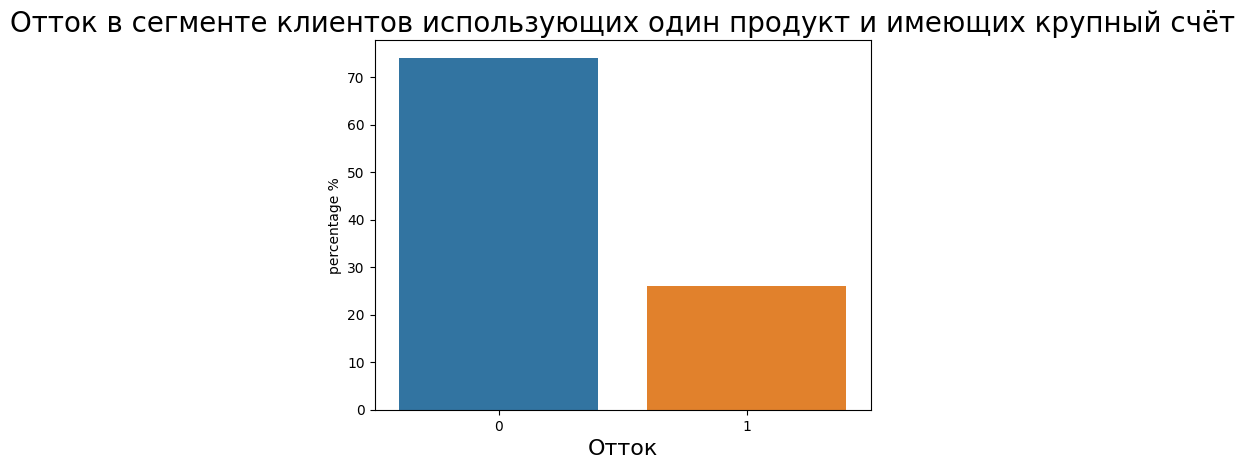

,churn,userid,percentage %
0,0,1545,74.07
1,1,541,25.93


In [34]:
#используют один продукт и имеют крупный счёт
oneprod_highbal = df.query('product_type == "один продукт" & balance_type == "высокий баланс"')


#подсчитаем отток в сегменте
oneprod_highbal_churn = oneprod_highbal.groupby('churn')['userid'].count().sort_values(ascending=False).reset_index()

#создадим столбец с процентом оттока
oneprod_highbal_churn['percentage %'] = round(100 * oneprod_highbal_churn['userid'] / oneprod_highbal_churn['userid'].sum(), 2)

#построим график оттока в сегменте
sns.barplot(data=oneprod_highbal_churn, x='churn', y='percentage %')
plt.title('Отток в сегменте клиентов использующих один продукт и имеющих крупный счёт', fontsize=20)
plt.xlabel('Отток', fontsize=16)

plt.show();
display(oneprod_highbal_churn)

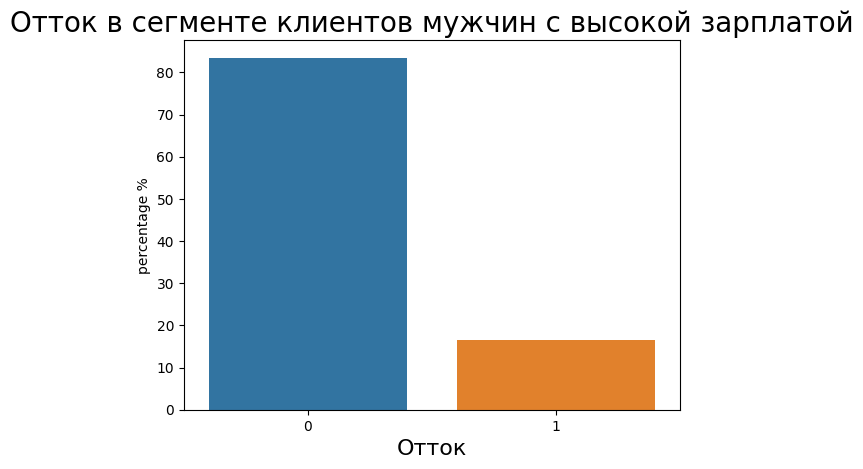

,churn,userid,percentage %
0,0,2081,83.47
1,1,412,16.53


In [35]:
#мужчины с высокой зарплатой
male_highsal = df.query('gender == "М" & salary_type == "высокая зарплата"')

#подсчитаем отток в сегменте
male_highsal_churn = male_highsal.groupby('churn')['userid'].count().sort_values(ascending=False).reset_index()

#создадим столбец с процентом оттока
male_highsal_churn['percentage %'] = round(100 * male_highsal_churn['userid'] / male_highsal_churn['userid'].sum(), 2)

#построим график оттока в сегменте
sns.barplot(data=male_highsal_churn, x='churn', y='percentage %')
plt.title('Отток в сегменте клиентов мужчин с высокой зарплатой', fontsize=20)
plt.xlabel('Отток', fontsize=16)

plt.show();
display(male_highsal_churn)

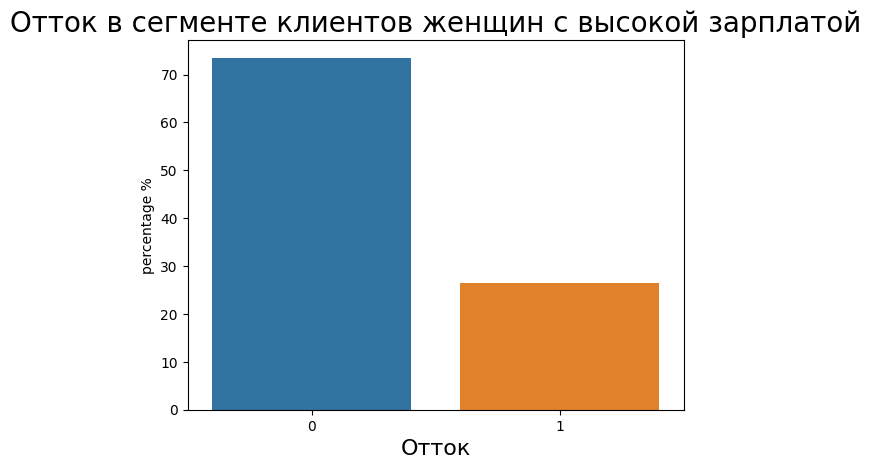

,churn,userid,percentage %
0,0,1588,73.52
1,1,572,26.48


In [36]:
#женщины с высокой зарплатой
female_highsal = df.query('gender == "Ж" & salary_type == "высокая зарплата"')



#подсчитаем отток в сегменте
female_highsal_churn = female_highsal.groupby('churn')['userid'].count().sort_values(ascending=False).reset_index()

#создадим столбец с процентом оттока
female_highsal_churn['percentage %'] = round(100 * female_highsal_churn['userid'] / female_highsal_churn['userid'].sum(), 2)

#построим график оттока в сегменте
sns.barplot(data=female_highsal_churn, x='churn', y='percentage %')
plt.title('Отток в сегменте клиентов женщин с высокой зарплатой', fontsize=20)
plt.xlabel('Отток', fontsize=16)

plt.show();
display(female_highsal_churn)

**В итоге по сегментам у нас следующая ситуация:**

- **1. Средний возраст с высокой зарплатой** - здесь перестали пользоваться услугами банка чуть меньше трети клиентов `(28,9%)`. Это хоть и меньшая часть клиентов, но долю оттока есть куда сокращать, например за счёт привлечения клиентов, получающих зарплату на счёт в "Метанпромбанке".
- **2. Средний возраст с большим счётом** - похожая ситуация и в этом сегменте, отток здесь составляет `31,17%`. Направление для улучшения ситуации в данном сегменте - создание привлекательных условий для хранения или инвестирования средств.
- **3. Использует один продукт и имеет высокий доход** - уровень оттока в этом сегменте тоже составляет около трети от общего числа клиентов `(28,75%)`. Для удержания клиентов из этого сегмента стоит предложить им дополнительные услуги.
- **4. Использует один продукт и обладает большим счётом** - в этом сегменте перестали быть клиентами банка около `25,93%`. 
- **5. Мужчина с высоким доходом** - в этом сегменте клиентов отток минимальный `(16,53%)`. Это потенциальная аудитория, которую мы можем привлекать для обслуживания.
- **6. Женщина с высоким доходом** - в этом сегменте отток примерно равнозначем тому, что и в других группах клиентов `(26,48%)`. Можно предложить им услуги персонального менеджера.

Выделенные сегменты клиентов оказались достаточно стабильными и процент оттока в них относительно низкий. Тем не менее перед нами стоит цель удержать этих клиентов и предложить выгодные им продукты и привлечь новых клиентов с такими же характеристиками.


## Формулировка и проверка статистических гипотез

1. **H0** - есть разница в среднем значении дохода клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя и более
  
  **H1** - нет разницы в среднем значении дохода клиентовв, которые пользуются одним продуктом и теми, кто пользуется двумя и более
2. **H0** - есть разница в среднем значении дохода клиентов из филиала в Ярославле и из филиалов в двух других городах

  **H1** - нет разницы в среднем значении дохода клиентов из филиала в Ярославле и из филиалов в двух других городах

**Проверим гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.**

In [37]:
#создадим соответствующие выборки уровня дохода в зависимости от количества используемых продуктов
s_level_1p = df.query('products == 1')['estimated_salary']
s_level_2p = df.query('products == 2')['estimated_salary']

In [38]:
#порог статистической значимости установим на уровне 5%
alpha = 0.05
results = st.ttest_ind(s_level_1p, s_level_2p, equal_var=False)
print(results.pvalue)
 
# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.4106493940071987
Не получилось отвергнуть нулевую гипотезу


**Проверим гипотезу различия дохода между клиентами из Ярославля и клиентами из других городов.**

In [39]:
#создадим соответствующие выборки уровня дохода в зависимости от города
yaroslavl = df.query('city == "Ярославль"')['estimated_salary']
not_yaroslavl = df.query('city != "Ярославль"')['estimated_salary']

In [40]:
#порог статистической значимости установим на уровне 5%
alpha = 0.05
results = st.ttest_ind(yaroslavl, not_yaroslavl, equal_var=False)
print(results.pvalue)
 
# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.7390454252259295
Не получилось отвергнуть нулевую гипотезу


**ВЫВОД ПО РАЗДЕЛУ**

По итогам проведённой проверки гипотез мы установили:
- нет разницы в среднем значении дохода клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя и более. Соответственно, с большой долей вероятности доходы клиентов,использующих разное количество продуктов банка не отличаются.
- нет разницы в среднем значении дохода клиентов из филиала в Ярославле и из филиалов в двух других городах. Соответственно, с большой долей вероятности доходы клиентов из Ярославля и других городов не отличаются.

## Выводы и рекомендации

- **описание этапов проведённого исследования и выводы**

Мы провели предварительный обзор и предобработку данных, их сследовательский анализ, сегментировали пользователей на основе данных о количестве потребляемых продуктов и других показателях. Проверили показатель оттока клиентов в зависимости от различных категорий данных и составили примерный портрет клиента банка, склонного к оттоку. 
Мы также проверили гипотезы о статистической значимости различий в доходе клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя и более и клиентов из Ярославля и двух других городов. В итоге мы выяснили, что статистически значимых различий в обоих случаях не наблюдается.

- **рекомендации**

В качестве рекомендаций обозначим необходимость обратить внимание на качество обслуживания и продуктов в ярославском филиале "Метанпромбанка". И усовершенствовать продукты банка для сегментов:

1. **Средний возраст с высокой зарплатой** - здесь перестали пользоваться услугами банка чуть меньше трети клиентов (28,9%). Для экономически активных клиентов среднего возраста с высоким уровнем зарплаты рекомендуется предложить "зарплатный проект" с выгодными условиями получения зарплаты на счёт в "Метанпромбанке".

2. **Средний возраст с большим счётом** - похожая ситуация и в этом сегменте, отток здесь составляет 31,17%. Направление для улучшения ситуации в данном сегменте - создание привлекательных условий для хранения или инвестирования средств. Для клиентов среднего возраста с крупными суммами на счёте рекомендуем предложить продукт с выгодными условиями по вкладу, например высокую процентную ставку при определенной сумме неснижаемого остатка.

3. **Использует один продукт и имеет высокий доход** - уровень оттока в этом сегменте тоже составляет около трети от общего числа клиентов (28,75%). Для удержания клиентов из этого сегмента стоит предложить им дополнительные услуги, например по страхованию вкладов или предоставлению кредита (кредитной карты).

4. **Использует один продукт и обладает большим счётом** - в этом сегменте перестали быть клиентами банка около 25,93%. Клиентам из сегмента  стоит предложить услуги инвестиционного брокера.

5. **Мужчина с высоким доходом** - в этом сегменте клиентов отток минимальный (16,53%). Это потенциальная аудитория, которую мы можем привлекать для обслуживания. Рекомендуется предложить услуги по управлению потоками денежных средств в виде электронного сервиса или персональных консультаций от сотрудника банка.

6. **Женщина с высоким доходом** - в этом сегменте отток примерно равнозначем тому, что и в других группах клиентов (26,48%). Можно предложить повышенный кешбек на определённые группы товаров, которые могут интересовать представителей этого клиентского сегмента.